<a href="https://colab.research.google.com/github/RyuJungSoo/2022_winter_ai_study/blob/main/MNIST_%EC%86%90%EA%B8%80%EC%94%A8_%EC%9D%B8%EC%8B%9D%ED%95%98%EA%B8%B0_%EA%B8%B0%EB%B3%B8_%ED%94%84%EB%A0%88%EC%9E%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [4]:
# seed 값 설정 
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [5]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255 # 케라스가 최적의 성능을 보이도록 255로 나누기
X_test = X_test.reshape(X_test.shape[0],784).astype('float32') / 255  # 케라스가 최적의 성능을 보이도록 255로 나누기

In [7]:
# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)


In [8]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
# 모델 실행 환경 설정
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 최적화 설정
MODEL_DIR = '../model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "../model/{epoch: 02d}-{val_loss: .4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, svae_best_only = True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [10]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=30, batch_size = 200, verbose = 0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: saving model to ../model/ 1- 0.1475.hdf5

Epoch 00002: saving model to ../model/ 2- 0.1018.hdf5

Epoch 00003: saving model to ../model/ 3- 0.0887.hdf5

Epoch 00004: saving model to ../model/ 4- 0.0782.hdf5

Epoch 00005: saving model to ../model/ 5- 0.0742.hdf5

Epoch 00006: saving model to ../model/ 6- 0.0675.hdf5

Epoch 00007: saving model to ../model/ 7- 0.0650.hdf5

Epoch 00008: saving model to ../model/ 8- 0.0632.hdf5

Epoch 00009: saving model to ../model/ 9- 0.0633.hdf5

Epoch 00010: saving model to ../model/ 10- 0.0621.hdf5

Epoch 00011: saving model to ../model/ 11- 0.0673.hdf5

Epoch 00012: saving model to ../model/ 12- 0.0705.hdf5

Epoch 00013: saving model to ../model/ 13- 0.0594.hdf5

Epoch 00014: saving model to ../model/ 14- 0.0646.hdf5

Epoch 00015: saving model to ../model/ 15- 0.0679.hdf5

Epoch 00016: saving model to ../model/ 16- 0.0693.hdf5

Epoch 00017: saving model to ../model/ 17- 0.0699.hdf5

Epoch 00018: saving model to ../model/ 18- 0.0796.hdf5



In [11]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" %(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0694 - accuracy: 0.9834

 Test Accuracy: 0.9834


In [12]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

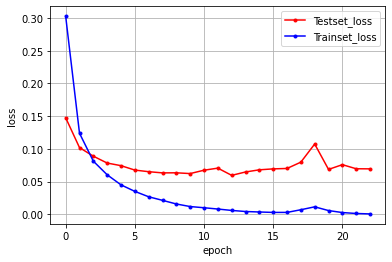

In [15]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c = "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c = "blue", label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()